<a href="https://colab.research.google.com/github/ShubhangiSRG24/AI-project-/blob/main/Liver_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter("ignore")

In [ ]:
liver_df = pd.read_csv("/content/indian_liver_patient.csv")

In [ ]:
# Total number of columns in the dataset
liver_df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [ ]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
# Information about the dataset
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
# Checking if there is some null values or not
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [ ]:
liver_df["Albumin_and_Globulin_Ratio"].mean()

0.9470639032815197

In [ ]:
liver_df["Albumin_and_Globulin_Ratio"] = liver_df["Albumin_and_Globulin_Ratio"].fillna(liver_df["Albumin_and_Globulin_Ratio"].mean())

In [ ]:
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [ ]:
# Dropping rows containing null values
#liver_df=liver_df.dropna()  


In [ ]:
liver_df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [ ]:
liver_df.duplicated().sum()

13

In [ ]:
# Removing duplicates in dataset
liver_df = liver_df.drop_duplicates(subset = None, keep = 'first')

## Remove Outliers from the features

In [ ]:
liver_df.drop(liver_df[liver_df['Total_Bilirubin']>50].index, inplace = True)
liver_df.drop(liver_df[liver_df['Direct_Bilirubin']>15].index, inplace = True)
liver_df.drop(liver_df[liver_df['Alamine_Aminotransferase']>1500].index, inplace = True)
liver_df.drop(liver_df[liver_df['Aspartate_Aminotransferase']>2000].index, inplace = True)
print(liver_df.shape)

(562, 11)


Number of patients diagnosed with liver disease:  398
Number of patients not diagnosed with liver disease:  164


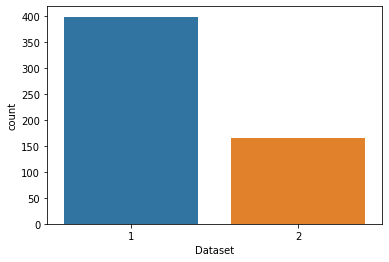

In [ ]:
sns.countplot(data=liver_df, x = 'Dataset', label='Count')

LD, NLD = liver_df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

In [ ]:
liver_df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000
mean,44.909253,2.994662,1.387544,290.567616,68.720641,92.870107,6.496441,3.152847,0.949392,1.291815
std,16.280976,4.984715,2.553015,244.484703,124.135737,165.866576,1.089516,0.799622,0.317876,0.455003
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,207.000000,34.000000,41.000000,6.600000,3.100000,0.948532,1.000000
75%,58.000000,2.400000,1.200000,298.000000,60.000000,83.750000,7.200000,3.800000,1.100000,2.000000
max,90.000000,32.600000,14.200000,2110.000000,1350.000000,1600.000000,9.600000,5.500000,2.800000,2.000000


In [ ]:
# convert dataset row into 0 and 1
def partition(x):
    if x == 2:
        return 0
    return 1

liver_df['Dataset'] = liver_df['Dataset'].map(partition)

Number of patients that are male:  422
Number of patients that are female:  140


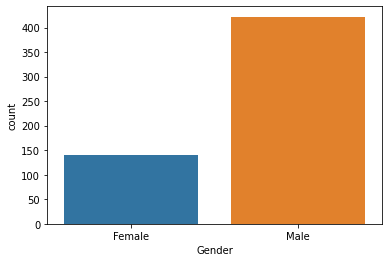

In [ ]:
sns.countplot(data=liver_df, x = 'Gender', label='Count')

M, F = liver_df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

In [ ]:
def partition(x):
    if x =='Male':
        return 0
    return 1

liver_df['Gender'] = liver_df['Gender'].map(partition)

In [ ]:
liver_df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,1


Dataset                       1.000000
Direct_Bilirubin              0.253282
Total_Bilirubin               0.242871
Aspartate_Aminotransferase    0.203684
Alkaline_Phosphotase          0.186954
Alamine_Aminotransferase      0.182103
Age                           0.141516
Total_Protiens               -0.038056
Gender                       -0.073721
Albumin                      -0.164780
Albumin_and_Globulin_Ratio   -0.169754
Name: Dataset, dtype: float64

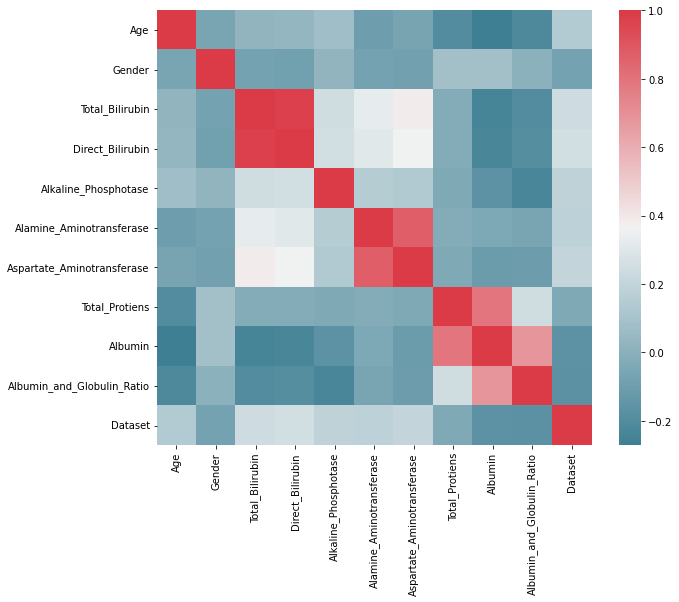

In [ ]:
correlation_matrix =liver_df.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=np.zeros_like(correlation_matrix, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
correlation_matrix['Dataset'].sort_values(ascending=False)

## Data Preparation

In [ ]:
# Object for target variable
y = liver_df.Dataset
# Object for input features
# X = liver_df.drop(['Dataset','Total_Protiens','Gender','Albumin','Albumin_and_Globulin_Ratio'], axis=1)
X = liver_df.drop(['Dataset'], axis=1)

In [ ]:
# Split Xand y into train and test sets
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

### Oversampling

In [ ]:
noLiverDisease = liver_df[liver_df['Dataset']==0]
hasLiverDisease = liver_df[liver_df['Dataset']==1]

In [ ]:
print(noLiverDisease.shape, hasLiverDisease.shape)

(164, 11) (398, 11)


In [ ]:
from imblearn.over_sampling import RandomOverSampler
op = RandomOverSampler(random_state=30)
X_res, y_res = op.fit_resample(X,y)

In [ ]:
X_res.shape, y_res.shape

((796, 10), (796,))

In [ ]:
# Split Xand y into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, 
                                                    test_size=0.2, 
                                                    random_state=1234)

In [ ]:
# Print number of observations in the above sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(636, 10) (160, 10) (636,) (160,)


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Using Machine Learning Models 

### Logistic Regression

The accuracy is : 
0.6902654867256637
The precision is : 
0.73
The recall is : 
0.9012345679012346
The f1_score is : 
0.8066298342541436


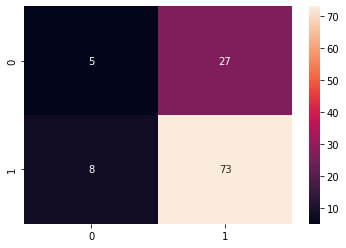

In [ ]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state = 0)
log_classifier.fit(X1_train, y1_train)

log_y1_pred = log_classifier.predict(X1_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_test, log_y1_pred)
sns.heatmap(cm, annot = True)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


print("The accuracy is : " )
print(accuracy_score(y1_test, log_y1_pred))
print("The precision is : " )
print(precision_score(y1_test, log_y1_pred))
print("The recall is : " )
print(recall_score(y1_test, log_y1_pred))
print("The f1_score is : " )
print(f1_score(y1_test, log_y1_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state = 0)
log_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
log_y_pred = log_classifier.predict(X_test)

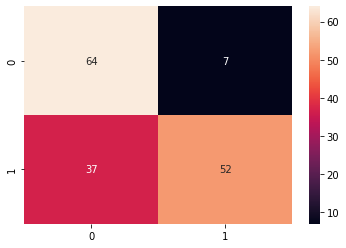

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, log_y_pred)
sns.heatmap(cm, annot = True)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc_log = accuracy_score(y_test, log_y_pred)
print("The accuracy is : " )
print(accuracy_score(y_test, log_y_pred))
print("The precision is : " )
print(precision_score(y_test, log_y_pred))
print("The recall is : " )
print(recall_score(y_test, log_y_pred))
print("The f1_score is : " )
print(f1_score(y_test, log_y_pred))

The accuracy is : 
0.725
The precision is : 
0.8813559322033898
The recall is : 
0.5842696629213483
The f1_score is : 
0.7027027027027027


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_log = AdaBoostClassifier(LogisticRegression(), n_estimators=700, algorithm="SAMME", learning_rate=0.5, random_state= 30)
ada_log.fit(X_train, y_train)
y_predadalog = ada_log.predict(X_test)
print(accuracy_score(y_test, y_predadalog))

0.75625


### KNN algorithm

The accuracy is : 
0.6902654867256637
The precision is : 
0.7090909090909091
The recall is : 
0.9629629629629629
The f1_score is : 
0.8167539267015707


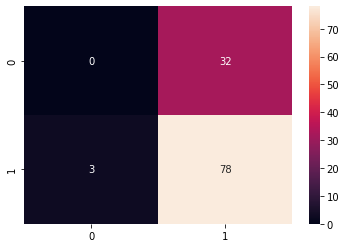

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=75, metric = 'minkowski')
knn_classifier.fit(X1_train, y1_train) 

knn_y1_pred = knn_classifier.predict(X1_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_test, knn_y1_pred)
sns.heatmap(cm, annot = True)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The accuracy is : " )
print(accuracy_score(y1_test, knn_y1_pred))
print("The precision is : " )
print(precision_score(y1_test, knn_y1_pred))
print("The recall is : " )
print(recall_score(y1_test, knn_y1_pred))
print("The f1_score is : " )
print(f1_score(y1_test, knn_y1_pred))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=75, metric = 'minkowski')
knn_classifier.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=75)

In [ ]:
knn_y_pred = knn_classifier.predict(X_test)

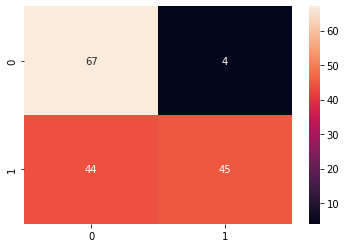

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, knn_y_pred)
sns.heatmap(cm, annot = True)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc_knn = accuracy_score(y_test, knn_y_pred)
print("The accuracy is : " )
print(accuracy_score(y_test, knn_y_pred))
print("The precision is : " )
print(precision_score(y_test, knn_y_pred))
print("The recall is : " )
print(recall_score(y_test, knn_y_pred))
print("The f1_score is : " )
print(f1_score(y_test, knn_y_pred))

The accuracy is : 
0.7
The precision is : 
0.9183673469387755
The recall is : 
0.5056179775280899
The f1_score is : 
0.6521739130434783


## SVM Algorithm

The accuracy is : 
0.6902654867256637
The precision is : 
0.7254901960784313
The recall is : 
0.9135802469135802
The f1_score is : 
0.8087431693989071


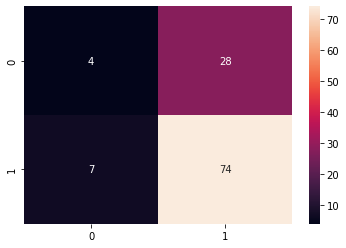

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'rbf', random_state = 1)
svm_classifier.fit(X1_train, y1_train)

svm_y1_pred = svm_classifier.predict(X1_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_test, svm_y1_pred)
sns.heatmap(cm, annot = True)

from sklearn.metrics import accuracy_score, precision_score

print("The accuracy is : " )
print(accuracy_score(y1_test, svm_y1_pred))
print("The precision is : " )
print(precision_score(y1_test, svm_y1_pred))
print("The recall is : " )
print(recall_score(y1_test, svm_y1_pred))
print("The f1_score is : " )
print(f1_score(y1_test, svm_y1_pred))

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'rbf', random_state = 1)
svm_classifier.fit(X_train, y_train) 

SVC(random_state=1)

In [ ]:
svm_y_pred = svm_classifier.predict(X_test)

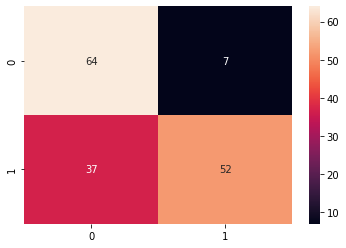

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, svm_y_pred)
sns.heatmap(cm, annot = True)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score
acc_svm = accuracy_score(y_test, svm_y_pred)
print("The accuracy is : " )
print(accuracy_score(y_test, svm_y_pred))
print("The precision is : " )
print(precision_score(y_test, svm_y_pred))
print("The recall is : " )
print(recall_score(y_test, svm_y_pred))
print("The f1_score is : " )
print(f1_score(y_test, svm_y_pred))

The accuracy is : 
0.725
The precision is : 
0.8813559322033898
The recall is : 
0.5842696629213483
The f1_score is : 
0.7027027027027027


## Random Forest classifier

The accuracy is : 
0.672566371681416
The precision is : 
0.7391304347826086
The recall is : 
0.8395061728395061
The f1_score is : 
0.7861271676300579


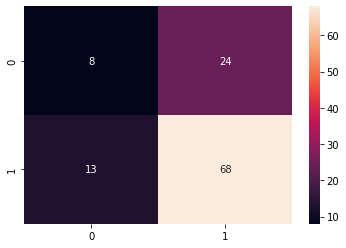

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

r1_classifier = RandomForestClassifier(n_estimators=80,criterion= 'gini', random_state=10, max_features='sqrt')
model = r1_classifier.fit(X1_train, y1_train)
y1_pred_random = model.predict(X1_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_test, y1_pred_random)
sns.heatmap(cm, annot = True)

from sklearn.metrics import accuracy_score, precision_score

print("The accuracy is : " )
print(accuracy_score(y1_test, y1_pred_random))
print("The precision is : " )
print(precision_score(y1_test, y1_pred_random))
print("The recall is : " )
print(recall_score(y1_test, y1_pred_random))
print("The f1_score is : " )
print(f1_score(y1_test, y1_pred_random))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
r_classifier = RandomForestClassifier(n_estimators=80,criterion= 'gini', random_state=10, max_features='sqrt')
model = r_classifier.fit(X_train, y_train)
y_pred_random = model.predict(X_test)


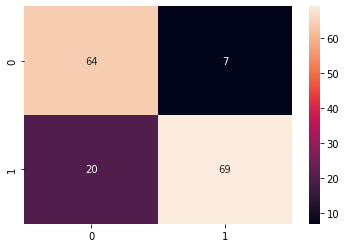

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_random)
sns.heatmap(cm, annot = True)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score
acc_ran = accuracy_score(y_test, y_pred_random)
print("The accuracy is : " )
print(accuracy_score(y_test, y_pred_random))
print("The precision is : " )
print(precision_score(y_test, y_pred_random))
print("The recall is : " )
print(recall_score(y_test, y_pred_random))
print("The f1_score is : " )
print(f1_score(y_test, y_pred_random))

The accuracy is : 
0.83125
The precision is : 
0.9078947368421053
The recall is : 
0.7752808988764045
The f1_score is : 
0.8363636363636364


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_log = AdaBoostClassifier(base_estimator = RandomForestClassifier(random_state = 90), n_estimators=100, algorithm="SAMME", learning_rate=0.5, random_state= 95)
ada_log.fit(X_train, y_train)
y_predadalog = ada_log.predict(X_test)
print(accuracy_score(y_test, y_predadalog))

0.80625


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbclass = GradientBoostingClassifier(
                    random_state = 1000,
                    verbose = 0,
                    n_estimators = 10,
                    learning_rate = 0.9,
                    loss = 'deviance',
                    max_depth = 3
                   )
# Train the model using the training sets and check score
gbclass.fit(X_train, y_train)
#Predict Output
predicted= gbclass.predict(X_test)

gbclass_score = round(gbclass.score(X_train, y_train) * 100, 2)
gbclass_score_test = round(gbclass.score(X_test, y_test) * 100, 2)
print('Score: \n', gbclass_score)
print('Test Score: \n', gbclass_score_test)
print('Accuracy: \n', accuracy_score(y_test,predicted))
print(confusion_matrix(predicted,y_test))

Score: 
 90.25
Test Score: 
 80.0
Accuracy: 
 0.8
[[61 22]
 [10 67]]


## Comparing Model performance

In [ ]:
models_comparison = [['Logistic Regression',acc_log*100],
                     ['K Nearest Neighbor',acc_knn*100],
                     ['Support Vector Classfication',acc_svm*100], 
                     ['Random Forest Classifiaction',acc_ran*100]
                    ]
models_compaison_df = pd.DataFrame(models_comparison,columns=['Model','% Accuracy'])
models_compaison_df.head()

,Model,% Accuracy
0,Logistic Regression,72.500
1,K Nearest Neighbor,70.000
2,Support Vector Classfication,72.500
3,Random Forest Classifiaction,83.125


Text(0.5, 0, 'Model')

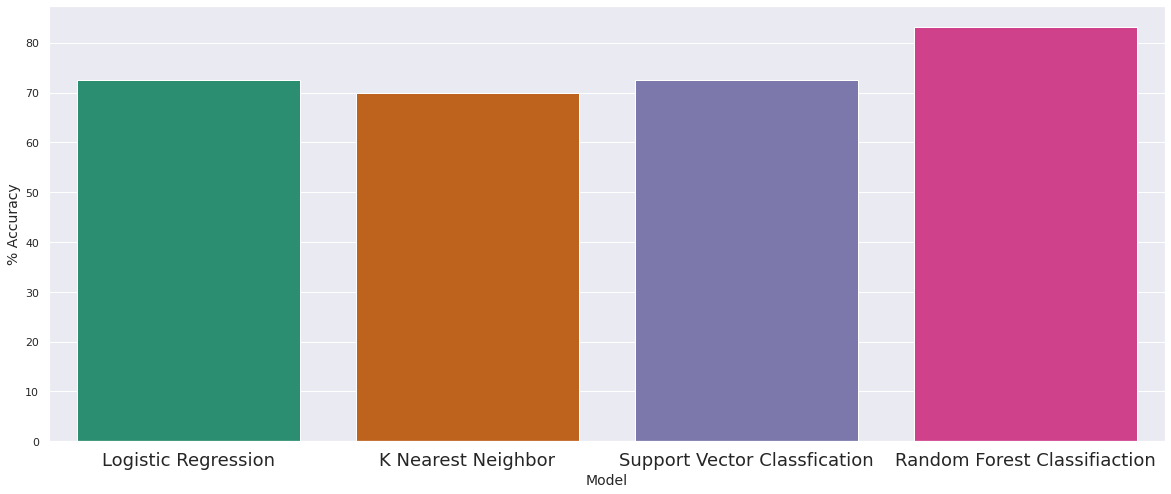

In [ ]:
fig = plt.figure(figsize=(20,8))
sns.set()
sns.barplot(x='Model',y='% Accuracy',data=models_compaison_df,palette='Dark2')
plt.xticks(size=18)
plt.ylabel('% Accuracy',size=14)
plt.xlabel('Model',size=14)

In [ ]:
liver_df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [ ]:
pip install sdv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 102 kB 4.6 MB/s 
     |████████████████████████████████| 53 kB 1.0 MB/s 
     |████████████████████████████████| 98 kB 4.4 MB/s 
     |████████████████████████████████| 46 kB 4.8 MB/s 
     |████████████████████████████████| 45 kB 3.7 MB/s 
     |████████████████████████████████| 1.2 MB 39.0 MB/s 
     |████████████████████████████████| 11.2 MB 20.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.6 MB/s 
     |████████████████████████████████| 930 kB 47.6 MB/s 
     |████████████████████████████████| 281 kB 41.3 MB/s 
     |████████████████████████████████| 636 kB 23.3 MB/s 
     |████████████████████████████████| 2.5 MB 37.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: pyyaml
    Found existing installation: P

In [ ]:
import pandas as pd
data = pd.read_csv('/content/indian_liver_patient.csv')
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
from sdv.tabular import GaussianCopula
model = GaussianCopula()
#from sdv.tabular import CTGAN
#model = CTGAN()
model.fit(data)
sample = model.sample(8000)
sample.head()
model = GaussianCopula(primary_key='Alkaline_Phosphotase')
model.fit(data)

In [ ]:
from sdv.evaluation import evaluate
evaluate(sample, data, metrics=['CSTest', 'KSTest'], aggregate=False)

,metric,name,raw_score,normalized_score,min_value,max_value,goal,error
0,CSTest,Chi-Squared,0.853414,0.853414,0.0,1.0,MAXIMIZE,None
1,KSTest,Inverted Kolmogorov-Smirnov D statistic,0.725961,0.725961,0.0,1.0,MAXIMIZE,None


In [ ]:
sample.shape

(8000, 11)

In [ ]:
sample.head

<bound method NDFrame.head of       Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0      47    Male              7.0               2.0                   624   
1      23    Male             13.0               4.8                   226   
2      44  Female              4.4               0.7                   864   
3      43    Male              4.5               1.8                   320   
4      64  Female              2.9               0.9                   414   
...   ...     ...              ...               ...                   ...   
7995   20  Female              5.8               2.9                   307   
7996   48  Female              7.0               1.8                   107   
7997   18    Male             11.8               4.7                   722   
7998   45    Male             11.2               3.9                   556   
7999   41    Male              7.0               3.6                   299   

      Alamine_Aminotransferase  A

In [ ]:
sample.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [ ]:
sample.duplicated().sum()

0

In [ ]:
sample.drop(sample[sample['Total_Bilirubin']>50].index, inplace = True)
sample.drop(sample[sample['Direct_Bilirubin']>15].index, inplace = True)
sample.drop(sample[sample['Alamine_Aminotransferase']>1500].index, inplace = True)
sample.drop(sample[sample['Aspartate_Aminotransferase']>2000].index, inplace = True)
print(sample.shape)

(8000, 11)


Number of patients diagnosed with liver disease:  4507
Number of patients not diagnosed with liver disease:  3493


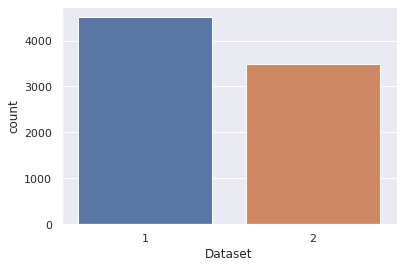

In [ ]:
import seaborn as sns
sns.countplot(data=sample, x = 'Dataset', label='Count')

LD, NLD = sample['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

In [ ]:
# convert dataset row into 0 and 1
def partition(x):
    if x == 2:
        return 0
    return 1

sample['Dataset'] = sample['Dataset'].map(partition)

Number of patients that are male:  5417
Number of patients that are female:  2583


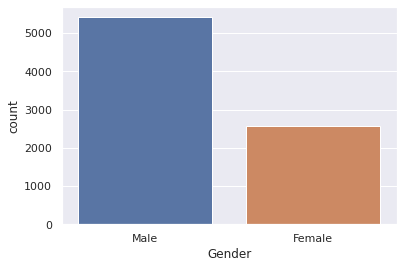

In [ ]:
sns.countplot(data=sample, x = 'Gender', label='Count')

M, F = sample['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

In [ ]:
def partition(x):
    if x =='Male':
        return 0
    return 1

sample['Gender'] = sample['Gender'].map(partition)

In [ ]:
sample

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,47,0,7.0,2.0,624,252,305,5.8,2.7,0.78,1
1,23,0,13.0,4.8,226,189,419,5.4,2.7,0.90,0
2,44,1,4.4,0.7,864,272,269,6.2,3.5,0.96,1
3,43,0,4.5,1.8,320,45,131,8.1,4.4,1.02,1
4,64,1,2.9,0.9,414,110,102,6.5,3.4,1.06,0
...,...,...,...,...,...,...,...,...,...,...,...
7995,20,1,5.8,2.9,307,164,117,7.3,4.5,1.49,0
7996,48,1,7.0,1.8,107,119,182,5.0,2.7,1.07,1
7997,18,0,11.8,4.7,722,202,490,7.0,2.6,0.61,1
7998,45,0,11.2,3.9,556,549,804,5.9,2.4,0.95,1


Dataset                       1.000000
Alamine_Aminotransferase      0.223390
Aspartate_Aminotransferase    0.221379
Total_Bilirubin               0.199420
Direct_Bilirubin              0.173857
Alkaline_Phosphotase          0.147398
Age                           0.084976
Total_Protiens               -0.014075
Gender                       -0.035143
Albumin                      -0.111512
Albumin_and_Globulin_Ratio   -0.126441
Name: Dataset, dtype: float64

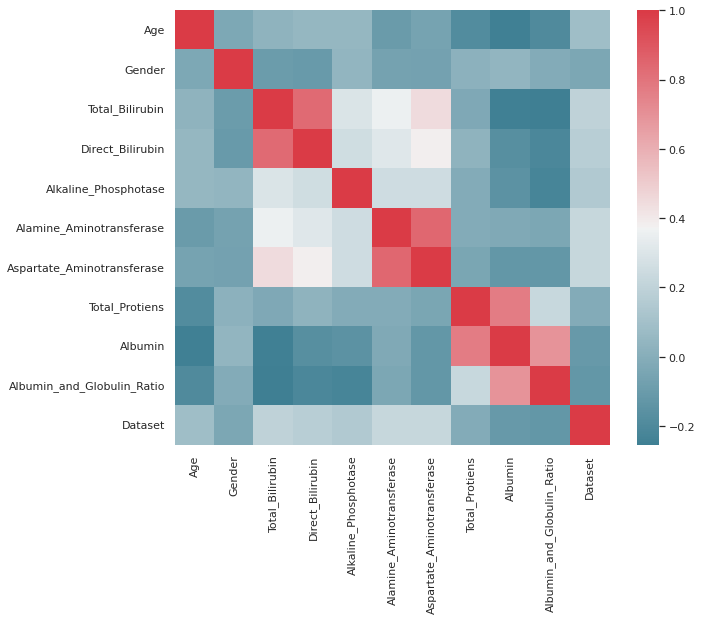

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
correlation_matrix =sample.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=np.zeros_like(correlation_matrix, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
correlation_matrix['Dataset'].sort_values(ascending=False)

##Data Preparation


In [ ]:
# Object for target variable
ys = sample.Dataset
# Object for input features
# X = liver_df.drop(['Dataset','Total_Protiens','Gender','Albumin','Albumin_and_Globulin_Ratio'], axis=1)
Xs = sample.drop(['Dataset', 'Gender','Total_Protiens','Gender','Albumin','Albumin_and_Globulin_Ratio'], axis=1)

In [ ]:
# Split Xand y into train and test sets
from sklearn.model_selection import train_test_split
Xs1_train, Xs1_test, ys1_train, ys1_test = train_test_split(Xs, ys, 
                                                    test_size=0.5, 
                                                    random_state=1884)

## Feature scaling of synthetic data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xs1_train = sc.fit_transform(Xs1_train)
Xs1_test = sc.transform(Xs1_test)

The accuracy is : 
0.59375
The precision is : 
0.6423982869379015
The recall is : 
0.6550218340611353
The f1_score is : 
0.6486486486486486


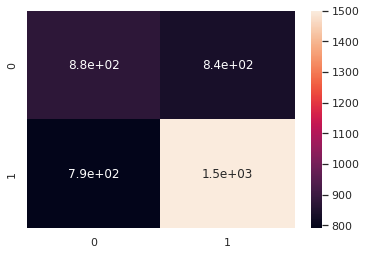

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

r1_classifier = RandomForestClassifier(n_estimators=80,criterion= 'gini', random_state=10, max_features='sqrt')
model = r1_classifier.fit(Xs1_train, ys1_train)
ys1_pred_random = model.predict(Xs1_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ys1_test, ys1_pred_random)
sns.heatmap(cm, annot = True)

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

print("The accuracy is : " )
print(accuracy_score(ys1_test, ys1_pred_random))
print("The precision is : " )
print(precision_score(ys1_test, ys1_pred_random))
print("The recall is : " )
print(recall_score(ys1_test, ys1_pred_random))
print("The f1_score is : " )
print(f1_score(ys1_test, ys1_pred_random))

The accuracy is : 
0.63
The precision is : 
0.6536418816388467
The recall is : 
0.7524017467248908
The f1_score is : 
0.6995533901745838


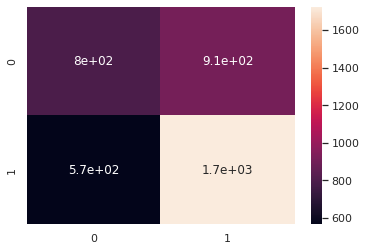

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'rbf', random_state = 1)
svm_classifier.fit(Xs1_train, ys1_train) 
svm1_y_pred = svm_classifier.predict(Xs1_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ys1_test, svm1_y_pred)
sns.heatmap(cm, annot = True)

from sklearn.metrics import accuracy_score, precision_score
acc_svm = accuracy_score(ys1_test, svm1_y_pred)
print("The accuracy is : " )
print(accuracy_score(ys1_test, svm1_y_pred))
print("The precision is : " )
print(precision_score(ys1_test, svm1_y_pred))
print("The recall is : " )
print(recall_score(ys1_test, svm1_y_pred))
print("The f1_score is : " )
print(f1_score(ys1_test, svm1_y_pred))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_log = AdaBoostClassifier(base_estimator = RandomForestClassifier(random_state = 90), n_estimators=100, algorithm="SAMME", learning_rate=0.5, random_state= 95)
ada_log.fit(Xs1_train, ys1_train)
ys1_predadalog = ada_log.predict(Xs1_test)
print(accuracy_score(ys1_test, ys1_predadalog))

0.599


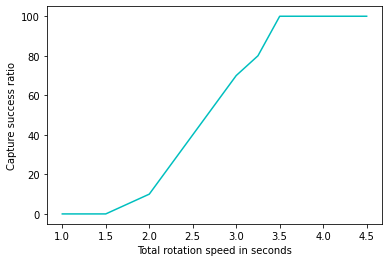

In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np 

x = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.25, 3.5, 4.0, 4.5])
y = np.array([0, 0, 10, 40, 70, 80, 100, 100, 100])
plt.plot(x, y, "c")

plt.xlabel("Total rotation speed in seconds")
plt.ylabel("Capture success ratio")

plt.show()

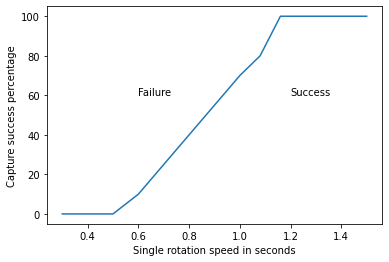

In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np 


x = np.array([0.3, 0.5, 0.6, 0.8, 1.0, 1.08, 1.16, 1.33, 1.5])
y = np.array([0, 0, 10, 40, 70, 80, 100, 100, 100])
plt.plot(x, y)
#plt.plot(x, y, '.', color='blue');


#plt.vlines(x=1.16, ymin=0, ymax=100, color='r', label = 'success')

plt.text(0.6,60,'Failure')

# this text will be right-aligned
plt.text(1.2,60,'Success')

plt.xlabel("Single rotation speed in seconds")
plt.ylabel("Capture success percentage")
plt.savefig('Graph.pdf', dpi=120, format='pdf', bbox_inches='tight')
plt.show()



ValueError: ignored

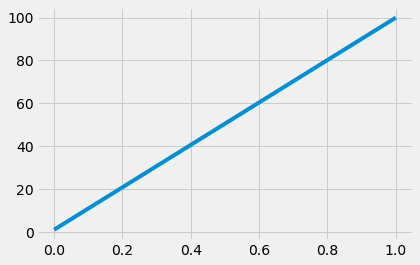

In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np 

#x = np.linspace(0,1, 100)
#y = np.linspace(0, 255)

with plt.style.context('fivethirtyeight'):
    plt.plot(x, np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100]))
    plt.plot(y, np.array([58,95,104,122,146,45,36,0,72,110,136,84,47,23,133,160,150,177,198,220,225,168,57,16,21,167,135,133,175,112,202,90,188,193,67,97,211,130,42,87,201,119,11,41,57,107,167,209,93,5,51,191,184,170,159,108,88,75,83,64,72,99,127,77,55,15,19,26,89,115,220,217,182,149,215,224,208,193,132,138,172,183,117,185,126,141,179,158,218,176,162,81,69,74,125,71,28,120,189,78]))
    plt.plot(y, np.array([80,117,113,116,156,69,47,77,83,97,142,110,65,58,128,155,146,182,186,214,224,145,38,12,29,167,152,131,173,103,193,102,200,195,55,111,223,137,62,77,206,124,40,45,63,115,175,218,86,10,74,183,167,156,133,114,92,84,90,73,55,107,122,84,63,24,26,33,93,119,223,211,173,148,208,213,200,187,147,142,182,181,119,197,128,154,169,148,224,188,178,88,72,68,121,83,34,127,195,82]))
    

#plt.plot(x, y)

plt.show()

plt.xlabel("Data instances")
plt.ylabel("Number of items in the cabinets")
plt.savefig('Compare.pdf', dpi=120, format='pdf', bbox_inches='tight')
plt.show()

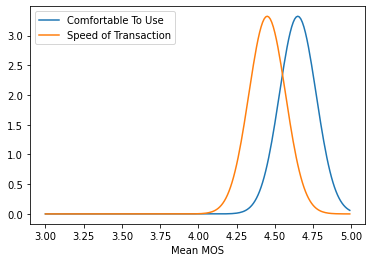

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from scipy.stats import norm
import statistics

# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(3, 5, 0.01)

# Calculating mean and standard deviation
mean = statistics.mean(x_axis)

sd = statistics.stdev(x_axis)

plt.plot(x_axis, norm.pdf(x_axis, 4.65, 0.12),  label='Comfortable To Use')
plt.plot(x_axis, norm.pdf(x_axis, 4.45, 0.12),  label='Speed of Transaction')

x = np.array([4, 4, 4, 5])
y = np.array([0, 0, 0, 0])

#plt.scatter(x, y)

plt.xlabel('Mean MOS')
plt.legend()
plt.savefig('MOS.pdf', dpi=120, format='pdf', bbox_inches='tight')

plt.show()